In [1]:
import gdown

url = 'https://drive.google.com/uc?id=1JKnvWEFRjvd-6HNpcQZRg5OJ1QEulc35'
output = 'ds_xray.zip'
gdown.download(url, output, quiet=False)

import zipfile
import os

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('ds_xray')

print("Dataset descargado y descomprimido en la carpeta 'ds_xray/'")

Downloading...
From (original): https://drive.google.com/uc?id=1JKnvWEFRjvd-6HNpcQZRg5OJ1QEulc35
From (redirected): https://drive.google.com/uc?id=1JKnvWEFRjvd-6HNpcQZRg5OJ1QEulc35&confirm=t&uuid=4b28b639-f741-4373-ac3e-de92684d0651
To: c:\Users\USUARIO\OneDrive\Documentos\vpcII_carreras_fajardo_mas\ds_xray.zip
100%|██████████| 140M/140M [00:12<00:00, 11.5MB/s] 


Dataset descargado y descomprimido en la carpeta 'ds_xray/'


In [10]:
#sobreecribimos el archivo data.yaml 
import yaml
import os

# Ruta al data.yaml
yaml_path = os.path.join("ds_xray", "data.yaml")  # Cambiá si tu carpeta es distinta

# Sobrescribir el contenido correcto
data_fix = {
    "train": "../train/images",
    "val": "../valid/images",
    "test": "../test/images",
    "nc": 5,
    "names": ['gun', 'knife', 'wrench', 'scissors', 'pliers']
}

with open(yaml_path, "w") as f:
    yaml.dump(data_fix, f, default_flow_style=False)

print("data.yaml corregido")

data.yaml corregido


In [2]:
import os

base_dir = os.path.join(os.getcwd(), "ds_xray")

for split in ['train', 'valid', 'test']:
    img_dir = os.path.join(base_dir, split, 'images')
    n_imgs = len([f for f in os.listdir(img_dir) if f.endswith('.jpg')])
    print(f"{split}: {n_imgs} imágenes")

train: 6181 imágenes
valid: 1766 imágenes
test: 883 imágenes


In [3]:
from collections import Counter
import glob

label_files = glob.glob(os.path.join(base_dir, '**', 'labels', '*.txt'), recursive=True)
clases = Counter()

for label_file in label_files:
    with open(label_file, 'r') as f:
        for line in f:
            clase = line.strip().split()[0]  # la clase está en la 1ra columna
            clases[clase] += 1

print("Distribución de clases:")
for k, v in sorted(clases.items()):
    print(f"Clase {k}: {v} instancias")

Distribución de clases:
Clase 0: 1841 instancias
Clase 1: 1975 instancias
Clase 2: 1041 instancias
Clase 3: 1948 instancias
Clase 4: 2025 instancias


In [11]:
import yaml
import os

yaml_path = os.path.join(os.getcwd(), "ds_xray", "data.yaml")

with open(yaml_path, 'r') as f:
    data = yaml.safe_load(f)

print("Significado de cada clase:")
for i, name in enumerate(data['names']):
    print(f"Clase {i}: {name}")

Significado de cada clase:
Clase 0: gun
Clase 1: knife
Clase 2: wrench
Clase 3: scissors
Clase 4: pliers


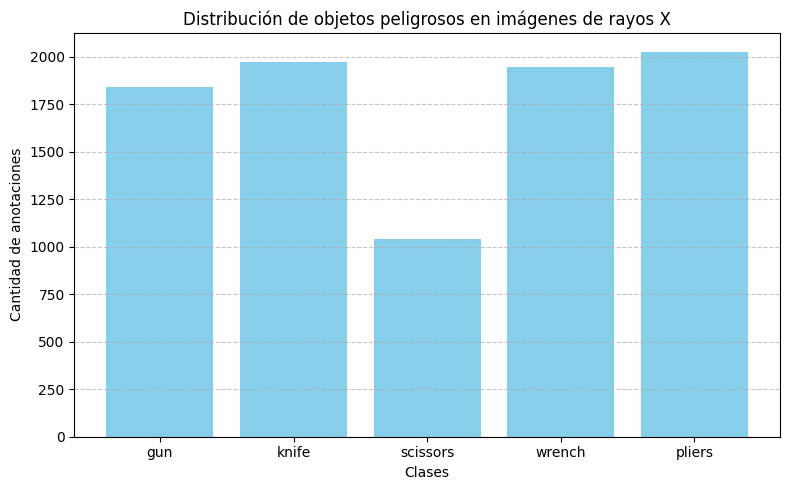

In [5]:
import matplotlib.pyplot as plt
from collections import Counter
import glob
import os

# Ruta al dataset
base_dir = os.path.join(os.getcwd(), "ds_xray")

# Nombres reales de las clases según data.yaml de Roboflow
nombres_clases = ['gun', 'knife', 'scissors', 'wrench', 'pliers']

# Contar clases en todos los .txt
label_files = glob.glob(os.path.join(base_dir, '**', 'labels', '*.txt'), recursive=True)
clase_counter = Counter()

for label_file in label_files:
    with open(label_file, 'r') as f:
        for line in f:
            if line.strip():
                clase = int(line.strip().split()[0])
                clase_counter[clase] += 1

# Generar listas automáticamente con nombres
clases = [nombres_clases[c] for c in sorted(clase_counter.keys())]
cantidades = [clase_counter[c] for c in sorted(clase_counter.keys())]

# Graficar
plt.figure(figsize=(8, 5))
plt.bar(clases, cantidades, color='skyblue')
plt.xlabel("Clases")
plt.ylabel("Cantidad de anotaciones")
plt.title("Distribución de objetos peligrosos en imágenes de rayos X")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [8]:
import os
import glob
from PIL import Image
import pandas as pd

# Ruta base
base_dir = os.path.join(os.getcwd(), "ds_xray")

# Buscar todas las imágenes dentro de train, valid, test
image_files = glob.glob(os.path.join(base_dir, '**', 'images', '*.*'), recursive=True)

# Extraer características
datos = []
for file in image_files:
    try:
        with Image.open(file) as img:
            ancho, alto = img.size
            modo = img.mode  # ej: RGB, L, etc.
            formato = os.path.splitext(file)[-1].lower()
            datos.append({
                "Archivo": os.path.basename(file),
                "Subset": file.split(os.sep)[-3],  # train, valid, test
                "Ancho": ancho,
                "Alto": alto,
                "Canales": len(img.getbands()),
                "Modo": modo,
                "Formato": formato
            })
    except:
        continue  # por si alguna imagen está corrupta

# Mostrar como DataFrame
df_imgs = pd.DataFrame(datos)

# Solo numéricas
print(df_imgs.describe())

# Solo categóricas
print(df_imgs.describe(include=['object']))


        Ancho    Alto  Canales
count  8830.0  8830.0   8830.0
mean    416.0   416.0      3.0
std       0.0     0.0      0.0
min     416.0   416.0      3.0
25%     416.0   416.0      3.0
50%     416.0   416.0      3.0
75%     416.0   416.0      3.0
max     416.0   416.0      3.0
                                                  Archivo Subset  Modo Formato
count                                                8830   8830  8830    8830
unique                                               8830      3     1       1
top     009008_jpg.rf.8f9d287571d5d48f46a87116a4a82d56...  train   RGB    .jpg
freq                                                    1   6181  8830    8830


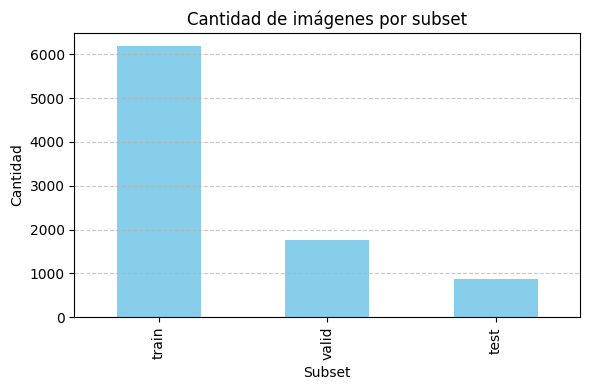

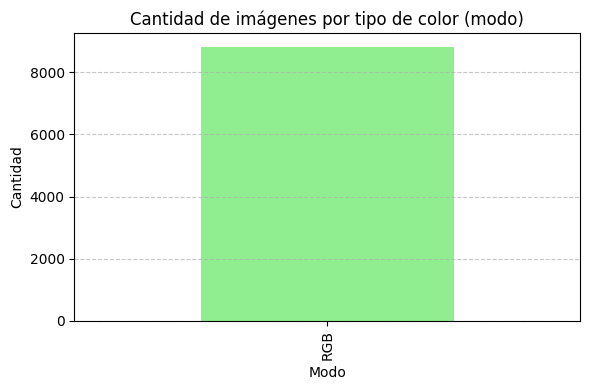

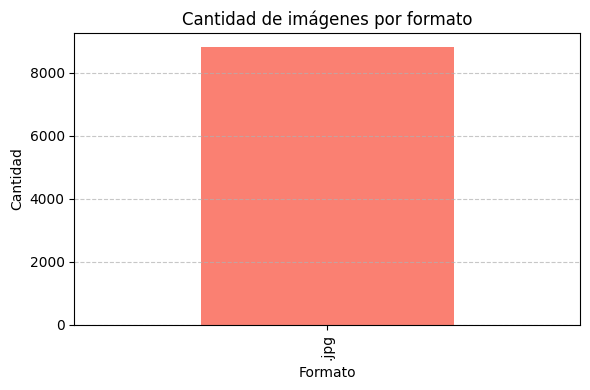

In [9]:
import os
import glob
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

# Ruta base
base_dir = os.path.join(os.getcwd(), "ds_xray")

# Buscar todas las imágenes
image_files = glob.glob(os.path.join(base_dir, '**', 'images', '*.*'), recursive=True)

# Extraer características
datos = []
for file in image_files:
    try:
        with Image.open(file) as img:
            ancho, alto = img.size
            modo = img.mode
            formato = os.path.splitext(file)[-1].lower()
            datos.append({
                "Archivo": os.path.basename(file),
                "Subset": file.split(os.sep)[-3],
                "Ancho": ancho,
                "Alto": alto,
                "Canales": len(img.getbands()),
                "Modo": modo,
                "Formato": formato
            })
    except:
        continue

df_imgs = pd.DataFrame(datos)

# Gráficos

# Subsets
subset_counts = df_imgs['Subset'].value_counts()
plt.figure(figsize=(6, 4))
subset_counts.plot(kind='bar', color='skyblue')
plt.title('Cantidad de imágenes por subset')
plt.xlabel('Subset')
plt.ylabel('Cantidad')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Modos
modo_counts = df_imgs['Modo'].value_counts()
plt.figure(figsize=(6, 4))
modo_counts.plot(kind='bar', color='lightgreen')
plt.title('Cantidad de imágenes por tipo de color (modo)')
plt.xlabel('Modo')
plt.ylabel('Cantidad')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Formatos
formato_counts = df_imgs['Formato'].value_counts()
plt.figure(figsize=(6, 4))
formato_counts.plot(kind='bar', color='salmon')
plt.title('Cantidad de imágenes por formato')
plt.xlabel('Formato')
plt.ylabel('Cantidad')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


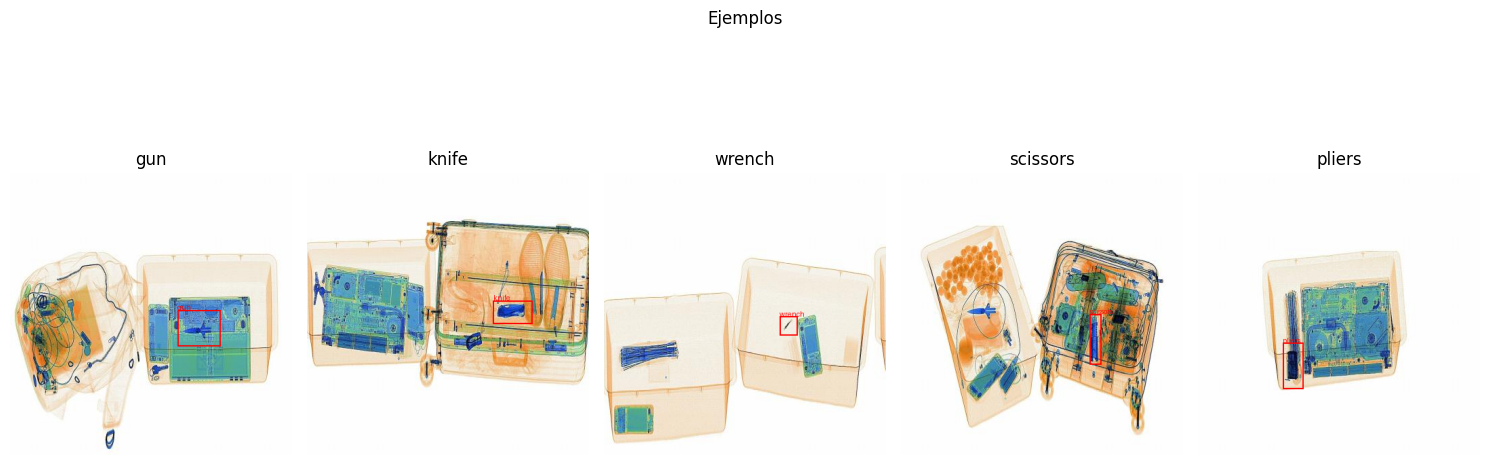

In [14]:
import os
import glob
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Nombres de clases reales
nombres_clases = ['gun', 'knife', 'wrench', 'scissors', 'pliers']

# Ruta base
base_dir = os.path.join(os.getcwd(), "ds_xray")
image_dir = os.path.join(base_dir, "train", "images")
label_dir = os.path.join(base_dir, "train", "labels")

# Mapear archivos por clase
mapa_clase_a_archivo = {}

# Recorrer etiquetas y guardar una imagen por clase
label_files = glob.glob(os.path.join(label_dir, '*.txt'))
for label_file in label_files:
    with open(label_file, 'r') as f:
        contenido = f.read()
        for line in contenido.strip().split('\n'):
            if line.strip():
                class_id = int(line.strip().split()[0])
                if class_id not in mapa_clase_a_archivo:
                    base = os.path.basename(label_file).replace('.txt', '.jpg')
                    if os.path.exists(os.path.join(image_dir, base)):
                        mapa_clase_a_archivo[class_id] = base
                if len(mapa_clase_a_archivo) == 5:
                    break
    if len(mapa_clase_a_archivo) == 5:
        break

# Mostrar las 5 imágenes con anotaciones
plt.figure(figsize=(15, 6))
for i, (class_id, img_file) in enumerate(sorted(mapa_clase_a_archivo.items())):
    img_path = os.path.join(image_dir, img_file)
    label_path = os.path.join(label_dir, img_file.replace('.jpg', '.txt'))

    image = Image.open(img_path).convert("RGB")
    draw = ImageDraw.Draw(image)
    w, h = image.size

    # Dibujar bounding boxes
    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 5:
                cls, x_center, y_center, width, height = map(float, parts)
                x1 = (x_center - width / 2) * w
                y1 = (y_center - height / 2) * h
                x2 = (x_center + width / 2) * w
                y2 = (y_center + height / 2) * h
                draw.rectangle([x1, y1, x2, y2], outline="red", width=2)
                draw.text((x1, y1 - 10), nombres_clases[int(cls)], fill="red")

    # Mostrar
    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
    plt.title(nombres_clases[class_id])
    plt.axis("off")

plt.suptitle("Ejemplos")
plt.tight_layout()
plt.show()



### Conclusion - Limpieza y analisis exploratorio del dataset

Se realizo un analisis preliminar del dataset de imagenes de rayos X con objetos peligrosos. Los principales hallazgos fueron:

- El dataset contiene un total de **8830 imagenes**, distribuidas en tres subconjuntos:
  - **Entrenamiento (train):** 6181 imagenes
  - **Validacion (valid):** 1766 imagenes
  - **Prueba (test):** 883 imagenes

- Todas las imagenes presentan las siguientes caracteristicas uniformes:
  - Resolucion fija de **416x416 pixeles**
  - Formato **.jpg**
  - Modo de color **RGB (3 canales)**

- La distribucion de clases es la siguiente:
  - gun: 1841 instancias
  - knife: 1975 instancias
  - scissors: 1041 instancias
  - wrench: 1948 instancias
  - pliers: 2025 instancias

- No se detectaron imagenes corruptas ni con dimensiones inconsistentes.
- La distribucion de clases es relativamente balanceada, aunque se observa una leve subrepresentacion de la clase **scissors**.
- Durante el analisis visual se detectaron errores puntuales en la anotacion de algunos objetos. En la clase "scissors", por ejemplo, se encontro una imagen donde el bounding box esta mal ubicado o asociado a un objeto incorrecto, mientras que una posible tijera visible en otra posicion no fue anotada. Este tipo de errores introduce ruido en el entrenamiento y puede afectar la precision del modelo, especialmente en clases subrepresentadas.

